<a href="https://colab.research.google.com/github/Vilmo18/computer_vision/blob/main/carre_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Dimensions des données d\'entraînement :', x_train.shape)
print('Dimensions des étiquettes d\'entraînement :', y_train.shape)
print('Dimensions des données de test :', x_test.shape)
print('Dimensions des étiquettes de test :', y_test.shape)

Dimensions des données d'entraînement : (50000, 32, 32, 3)
Dimensions des étiquettes d'entraînement : (50000, 1)
Dimensions des données de test : (10000, 32, 32, 3)
Dimensions des étiquettes de test : (10000, 1)


In [ ]:
classes = sorted(set(y_train.flatten()))

target_names = [
      'airplane', 'automobile', 'bird', 'cat', 'deer',
      'dog', 'frog', 'horse', 'ship', 'truck'
]

print("Target in CIFAR-10 dataset")
for classe in classes:
    print(classe)

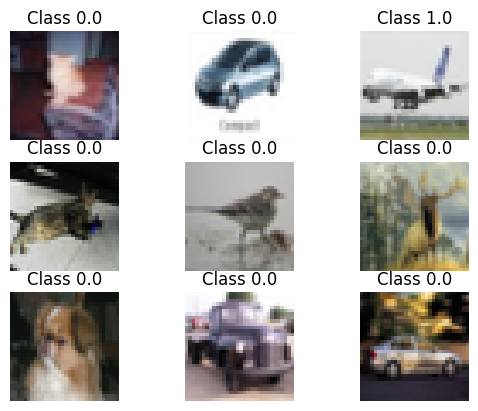

In [ ]:
indice_image = 0
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(f'Class {y_train[i][0]}')
plt.show()



In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# reshape the data
x_train = x_train.reshape(x_train.shape[0], 32*32*3)
x_test = x_test.reshape(x_test.shape[0], 32*32*3)

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# create a LDA object
lda = LinearDiscriminantAnalysis(n_components=3)

# fit the LDA on the training set
lda.fit(x_train, y_train)

# transform the training and test sets
x_train_lda = lda.transform(x_train)
x_test_lda = lda.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


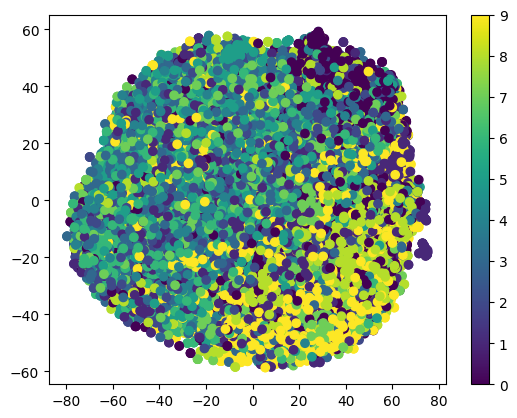

In [ ]:
from sklearn.manifold import TSNE
from keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
X = x_train.reshape(x_train.shape[0], -1)
y = y_train.reshape(-1)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X)


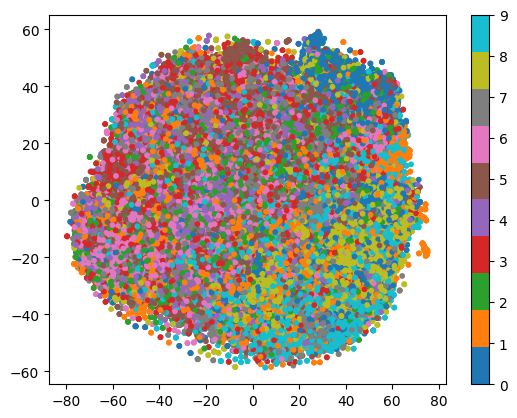

In [ ]:
# Visualize the t-SNE results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y,  cmap='tab10', s=10)
plt.colorbar()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# create a KMeans object
kmeans = KMeans(n_clusters=10, random_state=0)

# fit the KMeans on the t-SNE transformed data
kmeans.fit(X_tsne)

# predict the cluster labels
y_predX_tsne = kmeans.predict(X_tsne)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


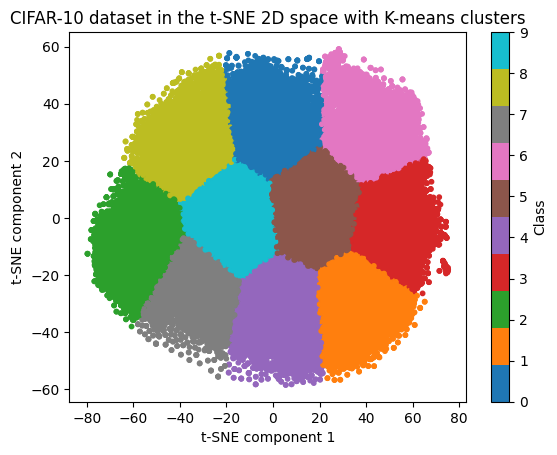

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_predX_tsne, cmap='tab10', s=10)
plt.colorbar(label='Class')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('CIFAR-10 dataset in the t-SNE 2D space with K-means clusters')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class CIFAR10Model(tf.keras.Model):
    def __init__(self):
        super(CIFAR10Model, self).__init__()
        self.conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')
        self.conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')
        self.pool1 = MaxPooling2D((2, 2))

        self.conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')
        self.conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')
        self.pool2 = MaxPooling2D((2, 2))
        self.drop2 = Dropout(0.1)

        self.conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')
        self.conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')
        self.pool3 = MaxPooling2D((2, 2))
        self.drop3 = Dropout(0.01)

        self.flatten = Flatten()
        self.dense1 = Dense(512, activation='relu')
        self.drop4 = Dropout(0.2)
        self.dense2 = Dense(10, activation='softmax')

    def call(self, inputs, training=True):
        x = self.conv1(inputs)
        x = self.conv2(x)
        x = self.pool1(x)

        x = self.conv3(x)
        x = self.conv4(x)
        x = self.pool2(x)
        if training:
            x = self.drop2(x)

        x = self.conv5(x)
        x = self.conv6(x)
        x = self.pool3(x)
        if training:
            x = self.drop3(x)

        x = self.flatten(x)
        x = self.dense1(x)
        if training:
            x = self.drop4(x)
        return self.dense2(x)

    def build_graph(self, raw_shape):
        x = tf.keras.Input(shape=raw_shape)
        return tf.keras.Model(inputs=[x], outputs=self.call(x))


def load_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    return (x_train, y_train), (x_test, y_test)

def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    (x_train, y_train), (x_test, y_test) = load_data()

    # Split the training data into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

    model = CIFAR10Model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


    # print summary
    model.build_graph((32, 32, 3)).summary()
      # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])

    #history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=256)

    plot_loss(history)

    # Evaluate on the test set
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {test_acc}")


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                             

KeyboardInterrupt: 

In [ ]:
del model

NameError: name 'model' is not defined

In [ ]:
# Assuming y_test, y_pred, and target_names are already defined
y_true = np.argmax(y_test, axis=1)


target_names = [
      'airplane', 'automobile', 'bird', 'cat', 'deer',
      'dog', 'frog', 'horse', 'ship', 'truck'
]

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=target_names)

# Print the report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    airplane       0.82      0.83      0.82      1000
  automobile       0.92      0.91      0.91      1000
        bird       0.71      0.70      0.70      1000
         cat       0.66      0.58      0.62      1000
        deer       0.74      0.79      0.77      1000
         dog       0.76      0.68      0.72      1000
        frog       0.78      0.87      0.82      1000
       horse       0.86      0.85      0.85      1000
        ship       0.86      0.92      0.89      1000
       truck       0.88      0.89      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



313/313 - 1s - 989ms/epoch - 3ms/step


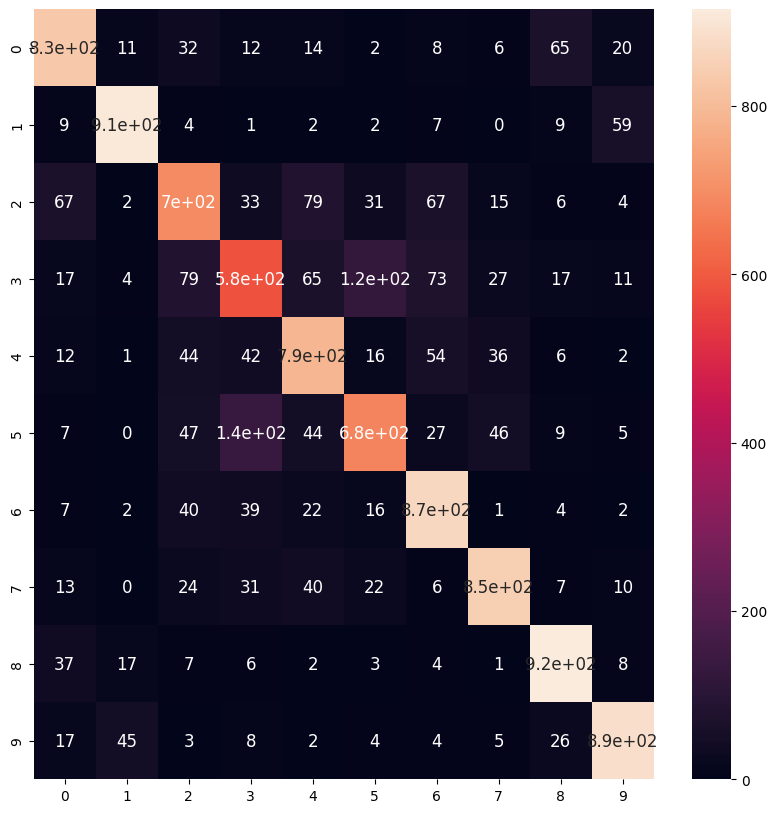

In [ ]:
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
cm = pd.DataFrame(cm, range(10),range(10))
plt.figure(figsize = (10,10))

sns.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()